In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [60]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

In [61]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
print(f"Train shape:{train_df.shape}")
print(f"Test shape:{test_df.shape}")

Train shape:(891, 12)
Test shape:(418, 11)


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


null values present in age and cabin

In [63]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [64]:
print(train_df.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [65]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


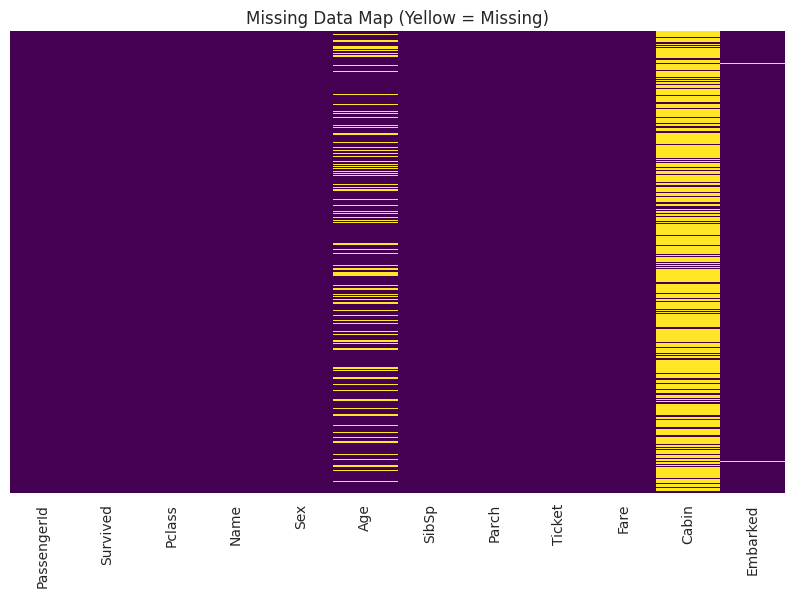

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Map (Yellow = Missing)")
plt.show()

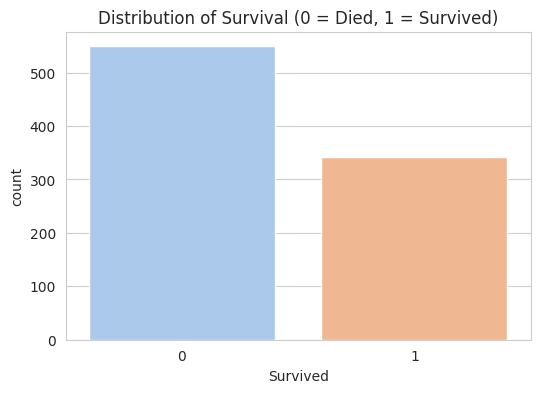

Overall Survival Rate: 38.38%


In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='pastel')
plt.title('Distribution of Survival (0 = Died, 1 = Survived)')
plt.show()

# Calculate exact percentage
survival_rate = train_df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

In [68]:
train_df["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

## Categorial Features:Sex,PClass,Embarked
## Numerical Features:Age,Fare

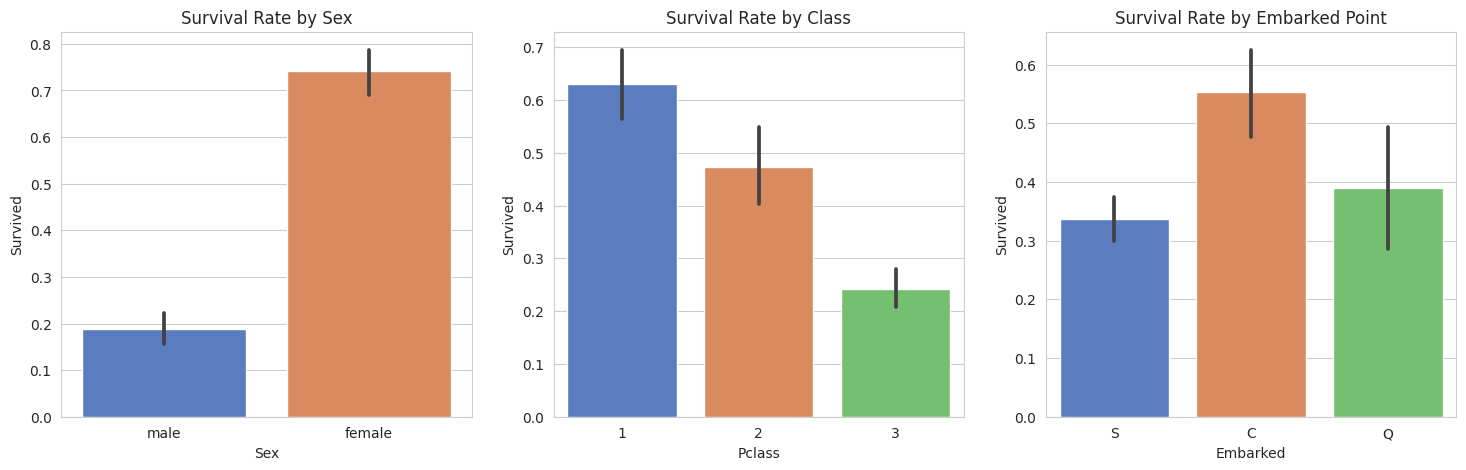

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0], palette='muted')
axes[0].set_title('Survival Rate by Sex')

# 2. Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[1], palette='muted')
axes[1].set_title('Survival Rate by Class')

# 3. Embarked vs Survival
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axes[2], palette='muted')
axes[2].set_title('Survival Rate by Embarked Point')

plt.show()

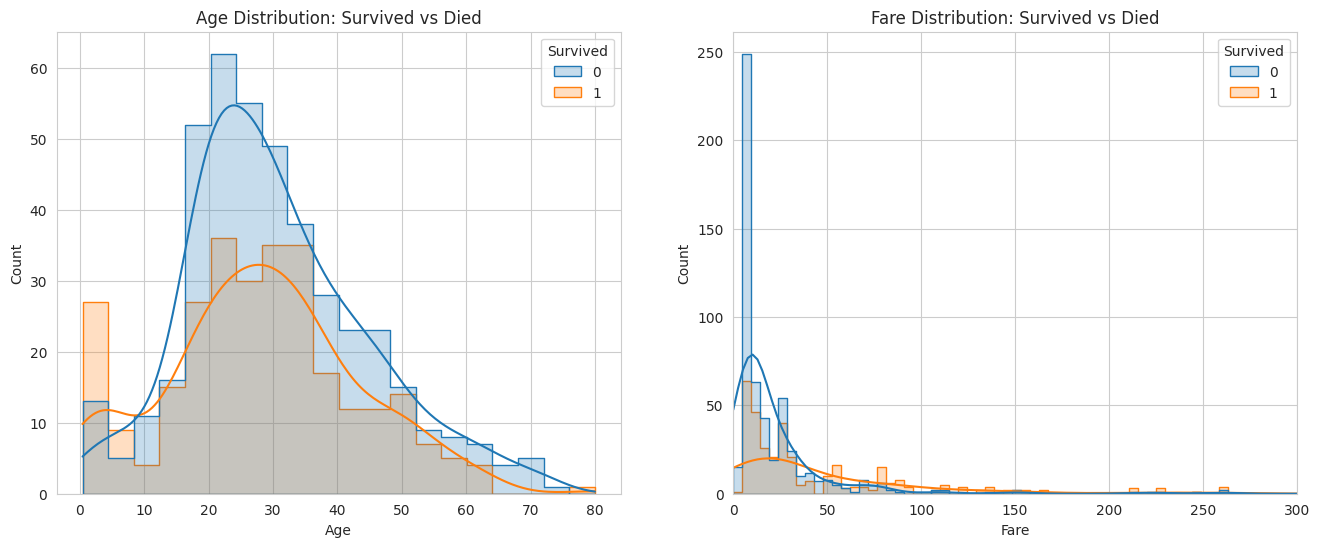

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Age Distribution by Survival
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, element="step", ax=axes[0])
axes[0].set_title('Age Distribution: Survived vs Died')

# 2. Fare Distribution by Survival (using log scale for better visibility)
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True, element="step", ax=axes[1])
axes[1].set_xlim(0, 300) # Limit x-axis to remove extreme outliers
axes[1].set_title('Fare Distribution: Survived vs Died')

plt.show()

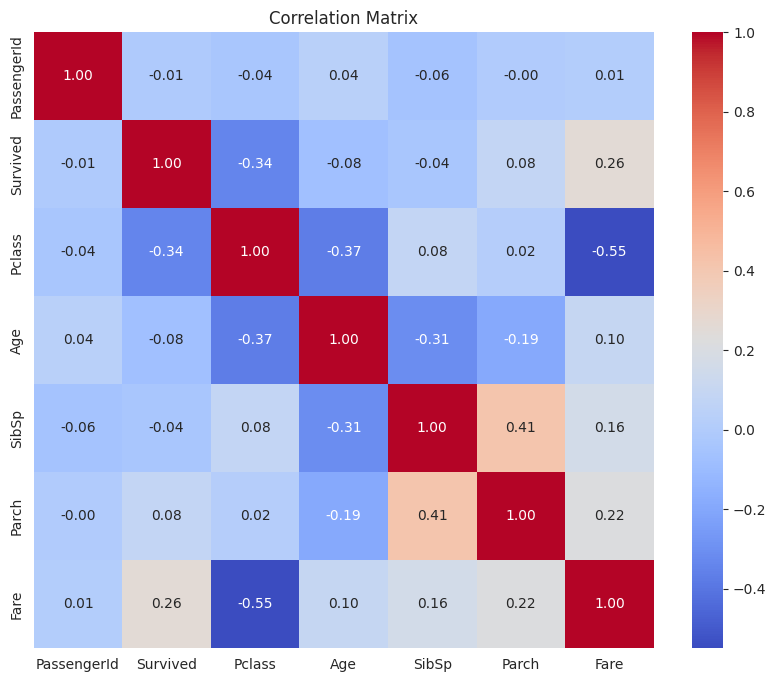

In [71]:
numeric_df=train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

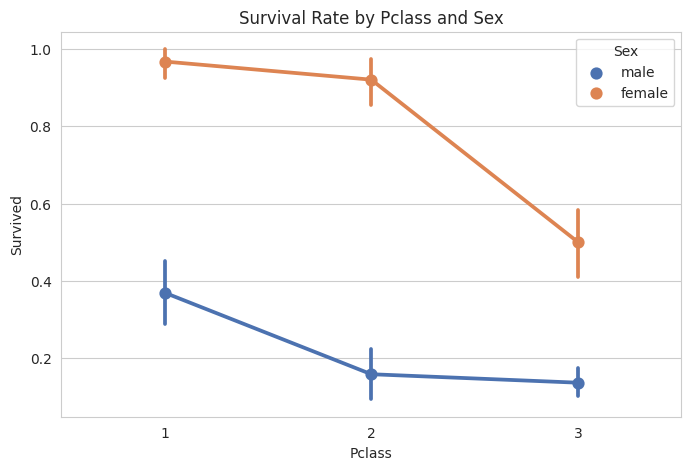

In [72]:
# Pointplot is great for comparing categorical variables
plt.figure(figsize=(8, 5))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_df, palette='deep')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

In [73]:
train_df['Relatives'] = train_df['SibSp'] + train_df['Parch']
test_df['Relatives'] = test_df['SibSp'] + test_df['Parch']



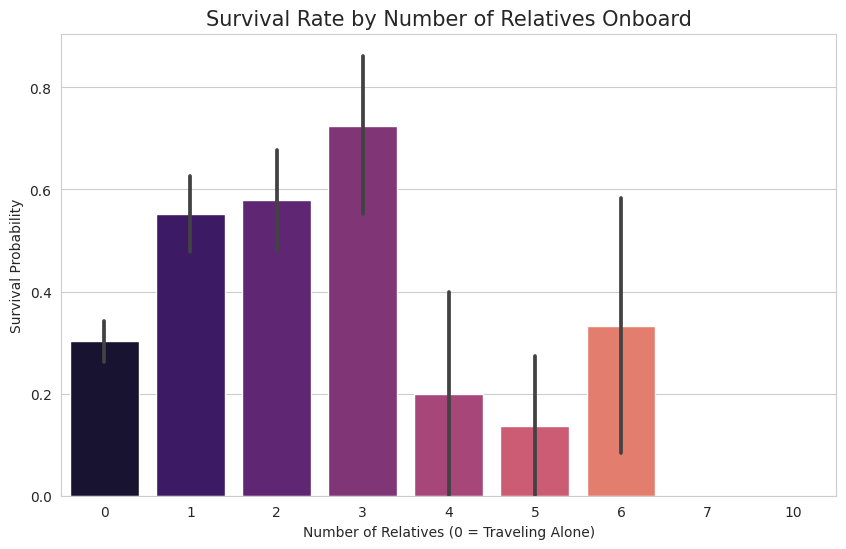

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Relatives', y='Survived', data=train_df, palette='magma')

ax.set_title('Survival Rate by Number of Relatives Onboard', fontsize=15)
ax.set_ylabel('Survival Probability')
ax.set_xlabel('Number of Relatives (0 = Traveling Alone)')

plt.show()

In [75]:
print(train_df[['Relatives','Survived']].groupby(['Relatives']).mean())

           Survived
Relatives          
0          0.303538
1          0.552795
2          0.578431
3          0.724138
4          0.200000
5          0.136364
6          0.333333
7          0.000000
10         0.000000


In [76]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Relatives'],
      dtype='object')

In [82]:
def prepare_data(df):
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

    df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1 
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    df['SmallFamily'] = ((df['FamilySize'] >= 2) & (df['FamilySize'] <= 4)).astype(int)

    

    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    

    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
   
    features = ['Pclass', 'Sex', 'Age', 'Fare','SmallFamily','Embarked', 'Title', 'IsAlone']
    return df[features]


train_clean=prepare_data(train_df.copy())
test_clean=prepare_data(test_df.copy())
print("Features being used:")
print(train_clean.columns.tolist())


Features being used:
['Pclass', 'Sex', 'Age', 'Fare', 'SmallFamily', 'Embarked', 'Title', 'IsAlone']


In [83]:
display(train_clean.head())

,Pclass,Sex,Age,Fare,SmallFamily,Embarked,Title,IsAlone
0,3,0,22.0,7.2500,1,0,1.0,0
1,1,1,38.0,71.2833,1,1,3.0,0
2,3,1,26.0,7.9250,0,0,2.0,1
3,1,1,35.0,53.1000,1,0,3.0,0
4,3,0,35.0,8.0500,0,0,1.0,1


In [84]:
X=train_clean
y=train_df['Survived']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 79.89%


In [87]:
# Predict on the test.csv data
test_predictions = model.predict(test_clean)

# Create submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

# Save it
submission.to_csv("submission3.csv", index=False)
print("Saved submission3csv!")

Saved submission3csv!
